In [ ]:
import pandas as pd

def collect_data_from_sources():
    # Placeholder: Fetch your data from relevant sources
    # Example: using pandas to read from a CSV file
    data = pd.read_csv('path_to_file.csv')
    return data

In [ ]:
#1. Payment History (35%) - 297.5 points
#payment_history_score(data):
#a. Number of past due items on file.
def payment_history_score(data):
    score = 0
  #a. Number of past due items on file.
      # For each past due item, the penalty increases, reflecting the risk.
    if data['past_due_items'] <= 5:
        score -= data['past_due_items'] * 10
    elif data['past_due_items'] <= 10:
        score -= data['past_due_items'] * 15
    else:
        score -= data['past_due_items'] * 20
#b. Severity of delinquency.
       # More severe delinquencies have larger penalties.
    if data['severity_of_delinquency'] == 'low':
        score -= 10
    elif data['severity_of_delinquency'] == 'medium':
        score -= 30
    else:
        score -= 60
#c. Duration since last delinquency.
    # Older delinquencies are less penalized.
    if data['duration_since_last_delinquency'] < 180:
        score -= 50
    elif data['duration_since_last_delinquency'] < 365:
        score -= 25
    else:
        score += 10
#d. Number of accounts paid as agreed.
    # The more accounts paid as agreed, the better the creditworthiness.
    if data['accounts_paid_as_agreed'] > 10:
        score += 50
    else:
        score += data['accounts_paid_as_agreed'] * 5
#e. Frequency of late payments in the past year.
    if data['late_payments_past_year'] > 5:
        score -= 50
    else:
        score -= data['late_payments_past_year'] * 10
#f. Presence of any public records (bankruptcy, tax liens, etc.).
    if data['public_records_present']:
        score -= 60
#g. Duration since public records.
    if data['time_since_public_record'] < 365:
        score -= 30
    elif data['time_since_public_record'] < 730:
        score -= 10
#h. Any settled accounts (settled for less than owed).
    if data['settled_accounts']:
        score -= 40
#i. Any accounts in collections.
    if data['accounts_in_collections']:
        score -= 50
#j. Past credit counseling or debt management services.
    if data['past_credit_counseling']:
        score -= 20


In [ ]:
#2. Amounts Owed (30%) - 255 points
#amounts_owed_score(data):
#a. Total debt.
def amounts_owed_score(data):
    if data['total_debt'] <= 20000:
        score -= 20
    elif data['total_debt'] <= 50000:
        score -= 40
    else:
        score -= 60
#b. Amount owed on different types of accounts.
    score -= data['amount_owed_on_credit_cards'] * 0.01
    score -= data['amount_owed_on_retail_accounts'] * 0.02
    score -= data['amount_owed_on_installment_loans'] * 0.01
    score -= data['amount_owed_on_mortgages'] * 0.005
#c. Number of accounts with balances.
    if data['accounts_with_balances'] <= 5:
        score -= 10
    elif data['accounts_with_balances'] <= 10:
        score -= 20
    else:
        score -= 30
#d. Proportion of credit limits used on revolving accounts.
    if data['credit_limit_used_proportion'] <= 0.3:
        score += 20
    elif data['credit_limit_used_proportion'] > 0.8:
        score -= 50
#e. Proportion of installment loan amounts outstanding.
    if data['loan_outstanding_proportion'] <= 0.5:
        score += 10
    elif data['loan_outstanding_proportion'] > 0.7:
        score -= 30
#f. Amount owed on recently opened accounts.
    score -= data['amount_owed_on_recently_opened_accounts'] * 0.02
#g. Number of accounts with significant balances.
    score -= data['accounts_with_significant_balances'] * 5
#h. Amount owed compared to original loan amounts.
    if data['proportion_owed_to_original'] > 0.8:
        score -= 40
#i. Outstanding judgments or suits.
    if data['outstanding_judgments']:
        score -= 50
#j. Number of zero-balance accounts.
    if data['zero_balance_accounts'] > 5:
        score += 20





In [ ]:
def length_of_credit_history_score(data):
  #3. Length of Credit History (15%) - 127.5 points
#length_of_credit_history_score(data):
#a. Age of oldest account.
    score += min(data['oldest_account_age'] / 365, 50)  # max 50 points for oldest account age
#b. Age of newest account.
    score -= min(data['newest_account_age'] / 365 * 2, 40)  # max penalty of 40 points for newest account age
#c. Average age of all accounts.
    score += min(data['average_account_age'] / 365 * 5, 50)  # max 50 points for average account age
#d. How long specific credit accounts have been established.
    score += min(data['specific_credit_account_duration'] / 365 * 3, 30)  # max 30 points for specific account duration
#e. Time since oldest revolving account was opened.
    score += min(data['oldest_revolving_account'] / 365, 20)  # max 20 points
#f. Time since newest installment account was opened.
    score -= min(data['newest_installment_account'] / 365 * 2, 15)  # max penalty of 15 points
#g. Time since oldest mortgage account was opened.
    score += min(data['oldest_mortgage_account'] / 365, 10)  # max 10 points
#h. Time since last account activity.
    if data['time_since_last_activity'] < 90:  # less than 3 months
        score += 10
#i. Number of recently closed accounts.
    score -= min(data['recently_closed_accounts'] * 5, 30)  # max penalty of 30 points
#j. Number of accounts opened in the last year.
    score -= min(data['accounts_opened_last_year'] * 5, 25)  # max penalty of 25 points


In [ ]:
def new_credit_score(data):
  #4. New Credit (10%) - 85 points
#new_credit_score(data):
#a. Number of recently opened accounts.
    score -= min(data['recently_opened_accounts'] * 5, 20)  # max penalty of 20 points
#b. Number of recent credit inquiries.
    score -= min(data['recent_credit_inquiries'] * 5, 25)  # max penalty of 25 points
#c. Time since recent account opening(s).
    if data['time_since_recent_account'] < 180:  # less than 6 months
        score -= 15
#d. Re-establishment of positive credit history after past payment problems.
    if data['re_establishment']:
        score += 25
#e. Opening too many new accounts in a short period.
    if data['many_accounts_opened_recently']:
        score -= 20
#f. Type of new accounts opened.
    if data['new_credit_card_accounts']:
        score -= 10
    if data['new_retail_accounts']:
        score -= 5
    if data['new_installment_loans']:
        score -= 7
#g. Time since recent credit inquiries.
    if data['time_since_last_inquiry'] < 30:  # less than 1 month
        score -= 5
#h. Number of accounts reviewed in the last year.
    score -= min(data['accounts_reviewed_last_year'], 10)  # 1 point for each account reviewed, max penalty of 10 points
#i. Number of hard inquiries vs soft inquiries.
    score -= data['hard_inquiries'] * 3
    score += data['soft_inquiries']  # soft inquiries usually don't affect credit score, but for this example, we're adding a minor positive
#j. New public records or collection actions in recent time.
    if data['new_public_records_or_collections']:
        score -= 20



In [ ]:
def types_of_credit_used_score(data):
  #5. Types of Credit Used (10%) - 85 points
#types_of_credit_used_score(data):
#a. Number of various types of accounts (diversification).
    score += min(data['num_various_types_accounts'] * 5, 30)  # max 30 points
#b. Lack of a certain type of account (e.g., no credit cards, only retail accounts).
    score -= data['lack_account_types'] * 10
#c. Presence of consumer finance accounts.
    if data['consumer_finance_accounts']:
        score -= 10
#d. Number of mortgage accounts.
    if data['mortgage_accounts'] >= 2:
        score += 10
#e. Number of installment loan accounts.
    score += min(data['installment_loan_accounts'], 5)  # max 5 points
#f. Number of revolving accounts (like credit cards).
    if data['revolving_accounts'] > 5:
        score -= 10
#g. Number of retail accounts.
    score -= min(data['retail_accounts'], 5)  # max penalty of 5 points
#h. Lack of recent installment loan information.
    if data['lack_recent_installment_info']:
        score -= 5
#i. Number of accounts with mortgage information.
    score += min(data['accounts_with_mortgage_info'] * 2, 10)  # max 10 points
#j. Presence of lease agreements or rental accounts.
    if data['lease_or_rental_accounts']:
        score -= 5


In [ ]:
def evaluate_factor(factor_value, thresholds, scores):
    for i, threshold in enumerate(thresholds):
        if factor_value <= threshold:
            return scores[i]
    return scores[-1]

def additional_factors_evaluation(data):

    risk_index = 0

    # Employment Stability: History and type of job
    employment_stability_scores = [-30, 0, 30]
    risk_index += evaluate_factor(data['employment_duration_years'], [1, 5], employment_stability_scores)

    # Residency Stability: How long an individual has lived at their current address
    residency_stability_scores = [-20, 0, 20]
    risk_index += evaluate_factor(data['residency_duration_years'], [1, 5], residency_stability_scores)

    # Ownership of assets: Land, gold, livestock, etc.
    asset_ownership_scores = [0, 10, 20, 30]
    risk_index += evaluate_factor(data['num_assets_owned'], [0, 2, 5], asset_ownership_scores)

    # Dependence on remittances
    remittance_dependence_scores = [-20, 0, 20]
    risk_index += evaluate_factor(data['monthly_remittances'], [200, 500], remittance_dependence_scores)

    # Exposure to political or conflict-related disruptions
    political_exposure_scores = [-50, -20, 0]
    risk_index += evaluate_factor(data['num_political_disruptions_yearly'], [5, 2], political_exposure_scores)

    # Business ownership or entrepreneurial activities
    business_ownership_scores = [0, 20, 40]
    risk_index += evaluate_factor(data['num_businesses_owned'], [0, 2], business_ownership_scores)

    # Participation in local saving groups
    local_saving_scores = [0, 15]
    risk_index += evaluate_factor(data['participation_in_saving_groups'], [0], local_saving_scores)

    # Reliability of utility bill payments
    utility_reliability_scores = [-30, 0, 20]
    risk_index += evaluate_factor(data['missed_utility_payments_yearly'], [3, 1], utility_reliability_scores)

    # Informal lending and borrowing activities
    lending_borrowing_scores = [-10, 0, 10]
    risk_index += evaluate_factor(data['informal_lending_borrowing_frequency_monthly'], [5, 2], lending_borrowing_scores)

    # Education level and quality
    education_scores = [0, 10, 20, 30]
    risk_index += evaluate_factor(data['education_level'], ['high_school', 'bachelor', 'masters'], education_scores)

    # Participation in microfinance programs
    microfinance_scores = [-10, 0, 20]
    risk_index += evaluate_factor(data['microfinance_participation_frequency'], [1, 3], microfinance_scores)

    # Mobile phone usage and payment behavior (prepaid, postpaid)
    mobile_payment_scores = [-15, 0, 15]
    risk_index += evaluate_factor(data['mobile_payment_behavior'], ['prepaid', 'postpaid'], mobile_payment_scores)

    # Social network reliability (references from community members)
    social_network_scores = [0, 10, 20]
    risk_index += evaluate_factor(data['social_reference_count'], [1, 3], social_network_scores)

    # Membership in cooperatives or other community-based organizations
    community_membership_scores = [0, 10]
    risk_index += evaluate_factor(data['community_membership_count'], [1], community_membership_scores)

    # Use and repayment of informal credit from local shops
    local_credit_repayment_scores = [-20, 0, 20]
    risk_index += evaluate_factor(data['local_credit_missed_payments'], [2, 1], local_credit_repayment_scores)

    # Legal disputes or issues
    legal_issues_scores = [-40, 0]
    risk_index += evaluate_factor(data['legal_disputes_count'], [1], legal_issues_scores)

    # Exposure to humanitarian aid or reliance on external assistance
    external_assistance_scores = [-10, 0, 10]
    risk_index += evaluate_factor(data['external_assistance_reliance'], ['high', 'low'], external_assistance_scores)

    # Cross-border trade or business activities
    cross_border_activity_scores = [0, 20]
    risk_index += evaluate_factor(data['cross_border_activity_count'], [1], cross_border_activity_scores)

    # Affiliation with NGOs or international organizations
    ngo_affiliation_scores = [0, 10]
    risk_index += evaluate_factor(data['ngo_affiliation_count'], [1], ngo_affiliation_scores)

    # Foreign currency holdings or activities
    foreign_currency_scores = [0, 15]

    # Proximity to conflict zones or areas with restricted movement
    proximity_conflict_scores = [-30, -10, 0]
    risk_index += evaluate_factor(data['proximity_to_conflict_zones'], ['very_close', 'close', 'far'], proximity_conflict_scores)

    # Level of local community integration
    community_integration_scores = [0, 10, 20]
    risk_index += evaluate_factor(data['community_integration_level'], ['low', 'medium', 'high'], community_integration_scores)

    # Membership in religious or cultural organizations
    religious_membership_scores = [0, 10]
    risk_index += evaluate_factor(data['religious_membership_count'], [1], religious_membership_scores)

    # Military service or affiliations
    military_service_scores = [-20, 0, 10]
    risk_index += evaluate_factor(data['military_service_status'], ['active', 'previous', 'none'], military_service_scores)

    # Financial literacy levels
    financial_literacy_scores = [-10, 0, 10, 20]
    risk_index += evaluate_factor(data['financial_literacy_level'], ['low', 'average', 'good', 'excellent'], financial_literacy_scores)

    # Internet usage and digital payment behaviors
    digital_behavior_scores = [-10, 0, 10]
    risk_index += evaluate_factor(data['digital_payment_frequency'], ['rarely', 'sometimes', 'often'], digital_behavior_scores)

    # Health status or chronic conditions that might impact earning ability
    health_status_scores = [-20, -10, 0, 10]
    risk_index += evaluate_factor(data['health_condition_impact'], ['high', 'medium', 'low', 'none'], health_status_scores)

    # Number of dependents
    dependents_scores = [-5, 0]
    for i in range(data['number_of_dependents']):
        risk_index += evaluate_factor(i, [3], dependents_scores)

    # Investments in local community projects
    local_investment_scores = [0, 10, 20]
    risk_index += evaluate_factor(data['local_investment_count'], [1, 3], local_investment_scores)

    # Participation in local or international training programs
    training_program_scores = [0, 10]
    risk_index += evaluate_factor(data['training_program_count'], [1], training_program_scores)

    return risk_index


In [ ]:
import pandas as pd
import random

# Generate a sample dataset for 10 individuals:
num_samples = 20000

data = {
    # Core factors:
    'past_due_items': [random.randint(0, 5) for _ in range(num_samples)],
    'severity_of_delinquency': [random.randint(0, 3) for _ in range(num_samples)],
    'duration_since_last_delinquency': [random.randint(0, 1000) for _ in range(num_samples)],
    'accounts_paid_as_agreed': [random.randint(0, 10) for _ in range(num_samples)],
    'total_debt': [random.randint(0, 100000) for _ in range(num_samples)],
    'amount_owed_on_diff_accounts': [random.randint(0, 5000) for _ in range(num_samples)],
    'accounts_with_balances': [random.randint(0, 5) for _ in range(num_samples)],
    'credit_limit_used_proportion': [random.uniform(0, 1) for _ in range(num_samples)],
    'loan_outstanding_proportion': [random.uniform(0, 1) for _ in range(num_samples)],
    'oldest_account_age': [random.randint(0, 3650) for _ in range(num_samples)],
    'newest_account_age': [random.randint(0, 3650) for _ in range(num_samples)],
    'average_account_age': [random.randint(0, 3650) for _ in range(num_samples)],
    'specific_credit_account_duration': [random.randint(0, 3650) for _ in range(num_samples)],
    'recently_opened_accounts': [random.randint(0, 5) for _ in range(num_samples)],
    'recent_credit_inquiries': [random.randint(0, 5) for _ in range(num_samples)],
    'time_since_recent_account': [random.randint(0, 365) for _ in range(num_samples)],
    're_establishment': [random.choice([True, False]) for _ in range(num_samples)],
    'num_various_types_accounts': [random.randint(0, 5) for _ in range(num_samples)],
    'lack_account_types': [random.randint(0, 3) for _ in range(num_samples)],
    # Additional Palestine-specific factors:
    'employment_stability': [random.choice(['stable', 'unstable']) for _ in range(num_samples)],
    'residency_stability': [random.choice(['less_than_a_year', '1-3_years', '3-5_years', 'over_5_years']) for _ in range(num_samples)],
    'ownership_of_assets': [random.choice(['land', 'gold', 'livestock', 'none']) for _ in range(num_samples)],
    'dependence_on_remittances': [random.uniform(0, 1) for _ in range(num_samples)],
    'exposure_to_disruptions': [random.choice(['high', 'medium', 'low', 'none']) for _ in range(num_samples)],
    'business_ownership': [random.choice([True, False]) for _ in range(num_samples)],
    'participation_in_saving_groups': [random.choice([True, False]) for _ in range(num_samples)],
    'utility_bill_payments_reliability': [random.choice(['always', 'often', 'rarely', 'never']) for _ in range(num_samples)],
    'informal_lending_activity': [random.choice(['borrower', 'lender', 'none']) for _ in range(num_samples)],
    'education_level': [random.choice(['primary', 'secondary', 'tertiary', 'none']) for _ in range(num_samples)],
    'microfinance_programs_participation': [random.choice([True, False]) for _ in range(num_samples)],
    'mobile_payment_behavior': [random.choice(['prepaid', 'postpaid', 'none']) for _ in range(num_samples)],
    'social_network_reliability': [random.randint(0, 5) for _ in range(num_samples)],
    'community_membership': [random.choice([True, False]) for _ in range(num_samples)],
    'informal_credit_repayment': [random.choice(['good', 'average', 'poor']) for _ in range(num_samples)],
    'legal_disputes': [random.choice([True, False]) for _ in range(num_samples)],
    'aid_reliance': [random.uniform(0, 1) for _ in range(num_samples)],
    'cross_border_trade': [random.choice([True, False]) for _ in range(num_samples)],
    'ngo_affiliation': [random.choice([True, False]) for _ in range(num_samples)],
    'foreign_currency_activities': [random.choice(['often', 'rarely', 'never']) for _ in range(num_samples)],
    'proximity_to_conflict_zones': [random.choice(['very_close', 'close', 'far']) for _ in range(num_samples)],
    'community_integration_level': [random.choice(['low', 'medium', 'high']) for _ in range(num_samples)],
    'religious_organization_membership': [random.choice([True, False]) for _ in range(num_samples)],
    'military_affiliation': [random.choice(['yes', 'no']) for _ in range(num_samples)],
    'financial_literacy_level': [random.choice(['low', 'average', 'good', 'excellent']) for _ in range(num_samples)],
    'internet_and_digital_payment_usage': [random.choice(['often', 'sometimes', 'rarely', 'never']) for _ in range(num_samples)],
    'health_condition_impact': [random.choice(['high', 'medium', 'low', 'none']) for _ in range(num_samples)],
    'number_of_dependents': [random.randint(0, 5) for _ in range(num_samples)],
    'community_project_investments': [random.randint(0, 3) for _ in range(num_samples)],
    'training_program_participation': [random.choice(['local', 'international', 'none']) for _ in range(num_samples)],
    'out_prncp_inv' : [random.randint(0, 10000) for _ in range(num_samples)],
    'out_prncp' : [random.randint(0, 10000) for _ in range(num_samples)],
    'last_pymnt_amnt' : [random.randint(0, 10000) for _ in range(num_samples)],
    'total_rec_prncp' : [random.randint(0, 10000) for _ in range(num_samples)],
    'total_pymnt_inv' : [random.randint(0, 10000) for _ in range(num_samples)],
    'total_pymnt' : [random.randint(0, 10000) for _ in range(num_samples)],
    'total_rec_int' : [random.randint(0, 10000) for _ in range(num_samples)],
    'total_cu_tl' : [random.randint(0, 10000) for _ in range(num_samples)],
    'acc_open_past_24mths' : [random.randint(0, 10000) for _ in range(num_samples)],
    'mo_sin_rcnt_tl' : [random.randint(0, 10000) for _ in range(num_samples)],
    'tot_cur_bal' : [random.randint(0, 10000) for _ in range(num_samples)],
    'avg_cur_bal' : [random.randint(0, 10000) for _ in range(num_samples)],
    'all_util' : [random.randint(0, 10000) for _ in range(num_samples)],
    'open_il_12m' : [random.randint(0, 10000) for _ in range(num_samples)],
    'funded_amnt_inv' : [random.randint(0, 10000) for _ in range(num_samples)],
    'open_rv_24m' : [random.randint(0, 10000) for _ in range(num_samples)],
    'max_bal_bc' : [random.randint(0, 10000) for _ in range(num_samples)],
    'funded_amnt' : [random.randint(0, 10000) for _ in range(num_samples)],
    'num_il_tl' : [random.randint(0, 10000) for _ in range(num_samples)],
    'mo_sin_old_rev_tl_op' : [random.randint(0, 10000) for _ in range(num_samples)],
}

df = pd.DataFrame(data)
print(df)


       past_due_items  severity_of_delinquency  \
0                   1                        1   
1                   1                        0   
2                   2                        3   
3                   2                        3   
4                   1                        2   
...               ...                      ...   
19995               4                        1   
19996               1                        2   
19997               4                        1   
19998               2                        2   
19999               4                        3   

       duration_since_last_delinquency  accounts_paid_as_agreed  total_debt  \
0                                  351                        2       48907   
1                                  506                        2       82368   
2                                  115                        5       14024   
3                                  635                        8       84469   
4   

In [ ]:
# 1. Preprocessing:
# Normalize numeric columns between 0 and 1:
for column in df.select_dtypes(['float64', 'int64']).columns:
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

# Encode categorical variables:
df = pd.get_dummies(df)

# 2. Feature Engineering:
# (For demonstration, assigning random weights; these should be based on domain knowledge and statistical analysis)
weights = {col: random.uniform(-1, 1) for col in df.columns}

# Calculate total score based on weights:
df['credit_score'] = df.dot(pd.Series(weights))

# 3. Modeling:
# This step is skipped as we're calculating scores based on predefined weights.

# 4. Testing:
# Here, we can't really test the scores without actual credit outcomes (like defaulting on a loan).
# So, this step is skipped in this context.

# Print scores:
print(df['credit_score'])


0       -0.140761
1       -1.990818
2       -4.622494
3       -4.462001
4       -2.090192
           ...   
19995    -7.45868
19996   -3.819952
19997   -2.584637
19998    1.887531
19999   -0.395209
Name: credit_score, Length: 20000, dtype: object


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import random

# Sample dataset definition
num_samples = 20000
data = {
    # Core factors:
    'past_due_items': [random.randint(0, 5) for _ in range(num_samples)],
    'severity_of_delinquency': [random.randint(0, 3) for _ in range(num_samples)],
    'duration_since_last_delinquency': [random.randint(0, 1000) for _ in range(num_samples)],
    'accounts_paid_as_agreed': [random.randint(0, 10) for _ in range(num_samples)],
    'total_debt': [random.randint(0, 100000) for _ in range(num_samples)],
    'amount_owed_on_diff_accounts': [random.randint(0, 5000) for _ in range(num_samples)],
    'accounts_with_balances': [random.randint(0, 5) for _ in range(num_samples)],
    'credit_limit_used_proportion': [random.uniform(0, 1) for _ in range(num_samples)],
    'loan_outstanding_proportion': [random.uniform(0, 1) for _ in range(num_samples)],
    'oldest_account_age': [random.randint(0, 3650) for _ in range(num_samples)],
    'newest_account_age': [random.randint(0, 3650) for _ in range(num_samples)],
    'average_account_age': [random.randint(0, 3650) for _ in range(num_samples)],
    'specific_credit_account_duration': [random.randint(0, 3650) for _ in range(num_samples)],
    'recently_opened_accounts': [random.randint(0, 5) for _ in range(num_samples)],
    'recent_credit_inquiries': [random.randint(0, 5) for _ in range(num_samples)],
    'time_since_recent_account': [random.randint(0, 365) for _ in range(num_samples)],
    're_establishment': [random.choice([True, False]) for _ in range(num_samples)],
    'num_various_types_accounts': [random.randint(0, 5) for _ in range(num_samples)],
    'lack_account_types': [random.randint(0, 3) for _ in range(num_samples)],
    # Additional Palestine-specific factors:
    'employment_stability': [random.choice(['stable', 'unstable']) for _ in range(num_samples)],
    'residency_stability': [random.choice(['less_than_a_year', '1-3_years', '3-5_years', 'over_5_years']) for _ in range(num_samples)],
    'ownership_of_assets': [random.choice(['land', 'gold', 'livestock', 'none']) for _ in range(num_samples)],
    'dependence_on_remittances': [random.uniform(0, 1) for _ in range(num_samples)],
    'exposure_to_disruptions': [random.choice(['high', 'medium', 'low', 'none']) for _ in range(num_samples)],
    'business_ownership': [random.choice([True, False]) for _ in range(num_samples)],
    'participation_in_saving_groups': [random.choice([True, False]) for _ in range(num_samples)],
    'utility_bill_payments_reliability': [random.choice(['always', 'often', 'rarely', 'never']) for _ in range(num_samples)],
    'informal_lending_activity': [random.choice(['borrower', 'lender', 'none']) for _ in range(num_samples)],
    'education_level': [random.choice(['primary', 'secondary', 'tertiary', 'none']) for _ in range(num_samples)],
    'microfinance_programs_participation': [random.choice([True, False]) for _ in range(num_samples)],
    'mobile_payment_behavior': [random.choice(['prepaid', 'postpaid', 'none']) for _ in range(num_samples)],
    'social_network_reliability': [random.randint(0, 5) for _ in range(num_samples)],
    'community_membership': [random.choice([True, False]) for _ in range(num_samples)],
    'informal_credit_repayment': [random.choice(['good', 'average', 'poor']) for _ in range(num_samples)],
    'legal_disputes': [random.choice([True, False]) for _ in range(num_samples)],
    'aid_reliance': [random.uniform(0, 1) for _ in range(num_samples)],
    'cross_border_trade': [random.choice([True, False]) for _ in range(num_samples)],
    'ngo_affiliation': [random.choice([True, False]) for _ in range(num_samples)],
    'foreign_currency_activities': [random.choice(['often', 'rarely', 'never']) for _ in range(num_samples)],
    'proximity_to_conflict_zones': [random.choice(['very_close', 'close', 'far']) for _ in range(num_samples)],
    'community_integration_level': [random.choice(['low', 'medium', 'high']) for _ in range(num_samples)],
    'religious_organization_membership': [random.choice([True, False]) for _ in range(num_samples)],
    'military_affiliation': [random.choice(['yes', 'no']) for _ in range(num_samples)],
    'financial_literacy_level': [random.choice(['low', 'average', 'good', 'excellent']) for _ in range(num_samples)],
    'internet_and_digital_payment_usage': [random.choice(['often', 'sometimes', 'rarely', 'never']) for _ in range(num_samples)],
    'health_condition_impact': [random.choice(['high', 'medium', 'low', 'none']) for _ in range(num_samples)],
    'number_of_dependents': [random.randint(0, 5) for _ in range(num_samples)],
    'community_project_investments': [random.randint(0, 3) for _ in range(num_samples)],
    'training_program_participation': [random.choice(['local', 'international', 'none']) for _ in range(num_samples)],
    'out_prncp_inv' : [random.randint(0, 10000) for _ in range(num_samples)],
    'out_prncp' : [random.randint(0, 10000) for _ in range(num_samples)],
    'last_pymnt_amnt' : [random.randint(0, 10000) for _ in range(num_samples)],
    'total_rec_prncp' : [random.randint(0, 10000) for _ in range(num_samples)],
    'total_pymnt_inv' : [random.randint(0, 10000) for _ in range(num_samples)],
    'total_pymnt' : [random.randint(0, 10000) for _ in range(num_samples)],
    'total_rec_int' : [random.randint(0, 10000) for _ in range(num_samples)],
    'total_cu_tl' : [random.randint(0, 10000) for _ in range(num_samples)],
    'acc_open_past_24mths' : [random.randint(0, 10000) for _ in range(num_samples)],
    'mo_sin_rcnt_tl' : [random.randint(0, 10000) for _ in range(num_samples)],
    'tot_cur_bal' : [random.randint(0, 10000) for _ in range(num_samples)],
    'avg_cur_bal' : [random.randint(0, 10000) for _ in range(num_samples)],
    'all_util' : [random.randint(0, 10000) for _ in range(num_samples)],
    'open_il_12m' : [random.randint(0, 10000) for _ in range(num_samples)],
    'funded_amnt_inv' : [random.randint(0, 10000) for _ in range(num_samples)],
    'open_rv_24m' : [random.randint(0, 10000) for _ in range(num_samples)],
    'max_bal_bc' : [random.randint(0, 10000) for _ in range(num_samples)],
    'funded_amnt' : [random.randint(0, 10000) for _ in range(num_samples)],
    'num_il_tl' : [random.randint(0, 10000) for _ in range(num_samples)],
    'mo_sin_old_rev_tl_op' : [random.randint(0, 10000) for _ in range(num_samples)],
    'defaulted': [random.choice([1, 0]) for _ in range(num_samples)],
}
df = pd.DataFrame(data)

# Splitting the data into features and target
X = df.drop('defaulted', axis=1)
y = df['defaulted']

# 1. Preprocessing and 2. Handling missing data:

# Separate numerical and categorical columns
numerical_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

# Impute numerical columns with median
num_imputer = SimpleImputer(strategy='median')
X[numerical_cols] = num_imputer.fit_transform(X[numerical_cols])

# Impute categorical columns with the most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')
X[categorical_cols] = cat_imputer.fit_transform(X[categorical_cols])

# Convert categorical variables to numeric using one-hot encoding
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# 3. Scale/normalize the data:
# Scale features to have zero mean and unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Feature engineering:
# (Here we're assuming you've already created relevant features. More complex transformations would depend on domain knowledge.)

# 5. & 6. Train the model and validate:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a logistic regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Validate model using cross-validation on training data
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
print(f"Mean cross-validation accuracy: {np.mean(cross_val_scores):.2f}")

# 7. Extract and interpret feature importances:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': clf.coef_[0]
})
print(feature_importance.sort_values(by='Importance', ascending=False))

# Test the model
y_pred = clf.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 8. Iterate on the model:
# Based on validation results, consider engineering new features, selecting different features, tuning hyperparameters, or trying different models.

Mean cross-validation accuracy: 0.51
                                   Feature  Importance
65        mobile_payment_behavior_postpaid    0.049804
60          informal_lending_activity_none    0.036241
16              num_various_types_accounts    0.036011
59        informal_lending_activity_lender    0.030582
78      community_integration_level_medium    0.029972
..                                     ...         ...
76  proximity_to_conflict_zones_very_close   -0.026588
20                            aid_reliance   -0.029175
90    training_program_participation_local   -0.029656
63                education_level_tertiary   -0.030043
89            health_condition_impact_none   -0.035880

[92 rows x 2 columns]
Test accuracy: 0.49925
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.36      0.42      1977
           1       0.50      0.63      0.56      2023

    accuracy                           0.50      4000
   macro avg   

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
num_samples = 20000
data = {
    # Core factors:
    'past_due_items': [random.randint(0, 5) for _ in range(num_samples)],
    'severity_of_delinquency': [random.randint(0, 3) for _ in range(num_samples)],
    'duration_since_last_delinquency': [random.randint(0, 1000) for _ in range(num_samples)],
    'accounts_paid_as_agreed': [random.randint(0, 10) for _ in range(num_samples)],
    'total_debt': [random.randint(0, 100000) for _ in range(num_samples)],
    'amount_owed_on_diff_accounts': [random.randint(0, 5000) for _ in range(num_samples)],
    'accounts_with_balances': [random.randint(0, 5) for _ in range(num_samples)],
    'credit_limit_used_proportion': [random.uniform(0, 1) for _ in range(num_samples)],
    'loan_outstanding_proportion': [random.uniform(0, 1) for _ in range(num_samples)],
    'oldest_account_age': [random.randint(0, 3650) for _ in range(num_samples)],
    'newest_account_age': [random.randint(0, 3650) for _ in range(num_samples)],
    'average_account_age': [random.randint(0, 3650) for _ in range(num_samples)],
    'specific_credit_account_duration': [random.randint(0, 3650) for _ in range(num_samples)],
    'recently_opened_accounts': [random.randint(0, 5) for _ in range(num_samples)],
    'recent_credit_inquiries': [random.randint(0, 5) for _ in range(num_samples)],
    'time_since_recent_account': [random.randint(0, 365) for _ in range(num_samples)],
    're_establishment': [random.choice([True, False]) for _ in range(num_samples)],
    'num_various_types_accounts': [random.randint(0, 5) for _ in range(num_samples)],
    'lack_account_types': [random.randint(0, 3) for _ in range(num_samples)],
    # Additional Palestine-specific factors:
    'employment_stability': [random.choice(['stable', 'unstable']) for _ in range(num_samples)],
    'residency_stability': [random.choice(['less_than_a_year', '1-3_years', '3-5_years', 'over_5_years']) for _ in range(num_samples)],
    'ownership_of_assets': [random.choice(['land', 'gold', 'livestock', 'none']) for _ in range(num_samples)],
    'dependence_on_remittances': [random.uniform(0, 1) for _ in range(num_samples)],
    'exposure_to_disruptions': [random.choice(['high', 'medium', 'low', 'none']) for _ in range(num_samples)],
    'business_ownership': [random.choice([True, False]) for _ in range(num_samples)],
    'participation_in_saving_groups': [random.choice([True, False]) for _ in range(num_samples)],
    'utility_bill_payments_reliability': [random.choice(['always', 'often', 'rarely', 'never']) for _ in range(num_samples)],
    'informal_lending_activity': [random.choice(['borrower', 'lender', 'none']) for _ in range(num_samples)],
    'education_level': [random.choice(['primary', 'secondary', 'tertiary', 'none']) for _ in range(num_samples)],
    'microfinance_programs_participation': [random.choice([True, False]) for _ in range(num_samples)],
    'mobile_payment_behavior': [random.choice(['prepaid', 'postpaid', 'none']) for _ in range(num_samples)],
    'social_network_reliability': [random.randint(0, 5) for _ in range(num_samples)],
    'community_membership': [random.choice([True, False]) for _ in range(num_samples)],
    'informal_credit_repayment': [random.choice(['good', 'average', 'poor']) for _ in range(num_samples)],
    'legal_disputes': [random.choice([True, False]) for _ in range(num_samples)],
    'aid_reliance': [random.uniform(0, 1) for _ in range(num_samples)],
    'cross_border_trade': [random.choice([True, False]) for _ in range(num_samples)],
    'ngo_affiliation': [random.choice([True, False]) for _ in range(num_samples)],
    'foreign_currency_activities': [random.choice(['often', 'rarely', 'never']) for _ in range(num_samples)],
    'proximity_to_conflict_zones': [random.choice(['very_close', 'close', 'far']) for _ in range(num_samples)],
    'community_integration_level': [random.choice(['low', 'medium', 'high']) for _ in range(num_samples)],
    'religious_organization_membership': [random.choice([True, False]) for _ in range(num_samples)],
    'military_affiliation': [random.choice(['yes', 'no']) for _ in range(num_samples)],
    'financial_literacy_level': [random.choice(['low', 'average', 'good', 'excellent']) for _ in range(num_samples)],
    'internet_and_digital_payment_usage': [random.choice(['often', 'sometimes', 'rarely', 'never']) for _ in range(num_samples)],
    'health_condition_impact': [random.choice(['high', 'medium', 'low', 'none']) for _ in range(num_samples)],
    'number_of_dependents': [random.randint(0, 5) for _ in range(num_samples)],
    'community_project_investments': [random.randint(0, 3) for _ in range(num_samples)],
    'training_program_participation': [random.choice(['local', 'international', 'none']) for _ in range(num_samples)],
    'out_prncp_inv' : [random.randint(0, 10000) for _ in range(num_samples)],
    'out_prncp' : [random.randint(0, 10000) for _ in range(num_samples)],
    'last_pymnt_amnt' : [random.randint(0, 10000) for _ in range(num_samples)],
    'total_rec_prncp' : [random.randint(0, 10000) for _ in range(num_samples)],
    'total_pymnt_inv' : [random.randint(0, 10000) for _ in range(num_samples)],
    'total_pymnt' : [random.randint(0, 10000) for _ in range(num_samples)],
    'total_rec_int' : [random.randint(0, 10000) for _ in range(num_samples)],
    'total_cu_tl' : [random.randint(0, 10000) for _ in range(num_samples)],
    'acc_open_past_24mths' : [random.randint(0, 10000) for _ in range(num_samples)],
    'mo_sin_rcnt_tl' : [random.randint(0, 10000) for _ in range(num_samples)],
    'tot_cur_bal' : [random.randint(0, 10000) for _ in range(num_samples)],
    'avg_cur_bal' : [random.randint(0, 10000) for _ in range(num_samples)],
    'all_util' : [random.randint(0, 10000) for _ in range(num_samples)],
    'open_il_12m' : [random.randint(0, 10000) for _ in range(num_samples)],
    'funded_amnt_inv' : [random.randint(0, 10000) for _ in range(num_samples)],
    'open_rv_24m' : [random.randint(0, 10000) for _ in range(num_samples)],
    'max_bal_bc' : [random.randint(0, 10000) for _ in range(num_samples)],
    'funded_amnt' : [random.randint(0, 10000) for _ in range(num_samples)],
    'num_il_tl' : [random.randint(0, 10000) for _ in range(num_samples)],
    'mo_sin_old_rev_tl_op' : [random.randint(0, 10000) for _ in range(num_samples)],
    'defaulted': [random.choice([1, 0]) for _ in range(num_samples)],
}
df = pd.DataFrame(data)
# 1.1. Interaction Terms:
# For simplicity, we'll create an interaction term between 'total_debt' and 'accounts_paid_as_agreed'.
df['debtXaccounts_paid'] = df['total_debt'] * df['accounts_paid_as_agreed']

# 1.2. Polynomial Features:
# Let's add a quadratic term for 'total_debt'.
df['total_debt_squared'] = df['total_debt'] ** 2

# 1.3. Binning:
# Binning 'total_debt' into categories.
bins = [0, 10000, 50000, 100000]
labels = ['low', 'medium', 'high']
df['total_debt_binned'] = pd.cut(df['total_debt'], bins=bins, labels=labels, include_lowest=True)

# Convert binned feature to one-hot encoding
df = pd.get_dummies(df, columns=['total_debt_binned'])



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Preprocessing and Handling Missing Data
# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# 2. Scale/normalize the data
X = df_encoded.drop('defaulted', axis=1)
y = df_encoded['defaulted']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Splitting Dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 4. Model Training
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# 5. Model Evaluation
y_pred = clf.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 6. Extract Feature Importances
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': clf.coef_[0]
})
print(feature_importance.sort_values(by='Importance', ascending=False))

Test accuracy: 0.48325
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.51      0.50      2023
           1       0.48      0.46      0.47      1977

    accuracy                           0.48      4000
   macro avg       0.48      0.48      0.48      4000
weighted avg       0.48      0.48      0.48      4000

Confusion Matrix:
 [[1024  999]
 [1068  909]]
                              Feature  Importance
12   specific_credit_account_duration    0.037147
29  religious_organization_membership    0.034168
14            recent_credit_inquiries    0.022471
19          dependence_on_remittances    0.021762
17         num_various_types_accounts    0.021602
..                                ...         ...
61           ownership_of_assets_land   -0.035339
77     informal_credit_repayment_good   -0.038224
63           ownership_of_assets_none   -0.039573
65     exposure_to_disruptions_medium   -0.040907
93     health_condition_impact

In [ ]:
from sklearn.feature_selection import RFE

# Using RFE with Logistic Regression as the estimator
selector = RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=15, step=1)
selector = selector.fit(X_train, y_train)

# Extracting the selected features
selected_features = X.columns[selector.support_]

# Reducing the dataset to only the selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Training the Logistic Regression model on the selected features
clf_selected = LogisticRegression(max_iter=1000)
clf_selected.fit(X_train_selected, y_train)

# Model Evaluation
y_pred_selected = clf_selected.predict(X_test_selected)
test_accuracy_selected = accuracy_score(y_test, y_pred_selected)

selected_features, test_accuracy_selected


(Index(['accounts_paid_as_agreed', 'specific_credit_account_duration',
        'microfinance_programs_participation', 'cross_border_trade',
        'religious_organization_membership', 'acc_open_past_24mths',
        'debtXaccounts_paid', 'residency_stability_3-5_years',
        'residency_stability_over_5_years', 'ownership_of_assets_land',
        'ownership_of_assets_none', 'exposure_to_disruptions_medium',
        'informal_credit_repayment_good', 'health_condition_impact_low',
        'health_condition_impact_medium'],
       dtype='object'),
 0.486)

In [ ]:
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
# Hyperparameter tuning for Random Forest using GridSearchCV

# Defining the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Evaluating the best model
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)
test_accuracy_rf = accuracy_score(y_test, y_pred_rf)

grid_search.best_params_, test_accuracy_rf


({'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}, 0.5)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Training the Gradient Boosting Classifier
gboost = GradientBoostingClassifier(n_estimators=150, random_state=42)
gboost.fit(X_train, y_train)

# Model Evaluation
y_pred_gboost = gboost.predict(X_test)
test_accuracy_gboost = accuracy_score(y_test, y_pred_gboost)

test_accuracy_gboost

0.4825

In [ ]:
# Refining synthetic data generation using domain knowledge

# Introducing correlations between features
def correlated_employment_residency():
    employment = random.choice(['stable', 'unstable'])
    if employment == 'stable':
        residency = random.choice(['1-3_years', '3-5_years', 'over_5_years'])
    else:
        residency = random.choice(['less_than_a_year', '1-3_years'])
    return employment, residency

data_refined = {
    'employment_stability': [],
    'residency_stability': []
}

for _ in range(num_samples):
    employment, residency = correlated_employment_residency()
    data_refined['employment_stability'].append(employment)
    data_refined['residency_stability'].append(residency)

# More realistic distribution for asset ownership based on employment stability
def assets_based_on_employment(employment):
    if employment == 'stable':
        return random.choice(['land', 'gold', 'livestock', 'none', 'none'])
    else:
        return random.choice(['gold', 'livestock', 'none', 'none', 'none'])

data_refined['ownership_of_assets'] = [assets_based_on_employment(emp) for emp in data_refined['employment_stability']]

# Introducing a new feature: income level
data_refined['income_level'] = ['high' if emp == 'stable' else random.choice(['low', 'medium']) for emp in data_refined['employment_stability']]

# Merging with the original data
for key, value in data.items():
    if key not in data_refined:
        data_refined[key] = value

# Creating a dataframe from the refined data
df_refined = pd.DataFrame(data_refined)

df_refined.head()  # Displaying the first few rows of the refined dataframe


,employment_stability,residency_stability,ownership_of_assets,income_level,past_due_items,severity_of_delinquency,duration_since_last_delinquency,accounts_paid_as_agreed,total_debt,amount_owed_on_diff_accounts,...,avg_cur_bal,all_util,open_il_12m,funded_amnt_inv,open_rv_24m,max_bal_bc,funded_amnt,num_il_tl,mo_sin_old_rev_tl_op,defaulted
0,unstable,1-3_years,none,low,0,0,923,6,83409,4749,...,3230,6669,3493,9731,9660,2044,4860,9699,544,0
1,unstable,less_than_a_year,gold,low,2,3,630,5,90604,4281,...,2041,8064,113,3790,1910,3389,4726,7296,4057,0
2,unstable,less_than_a_year,none,low,1,0,252,0,60588,2678,...,1347,3187,6236,5957,895,1228,2212,3366,1445,1
3,unstable,1-3_years,none,low,1,3,751,8,73528,2394,...,8171,4682,8594,6865,5849,4915,6233,1382,3524,1
4,stable,1-3_years,gold,high,2,0,840,5,76352,1511,...,4295,5457,8400,9592,5331,5350,4849,7122,9821,0


In [ ]:
# Data preprocessing for the refined dataset

# One-hot encoding for categorical variables
df_refined_encoded = pd.get_dummies(df_refined, drop_first=True)

# Scale/normalize the data
X_refined = df_refined_encoded.drop('defaulted', axis=1)
y_refined = df_refined_encoded['defaulted']

X_refined_scaled = scaler.fit_transform(X_refined)

# Splitting Dataset
X_train_refined, X_test_refined, y_train_refined, y_test_refined = train_test_split(X_refined_scaled, y_refined, test_size=0.2, random_state=42)

# Training the Logistic Regression model on the refined dataset
clf_refined = LogisticRegression(max_iter=1000)
clf_refined.fit(X_train_refined, y_train_refined)

# Model Evaluation
y_pred_refined = clf_refined.predict(X_test_refined)
test_accuracy_refined = accuracy_score(y_test_refined, y_pred_refined)

test_accuracy_refined


0.489

In [ ]:
def bootstrap_evaluation(model, X, y, iterations=100):
    accuracies = []

    for i in range(iterations):
        X_sample, y_sample = resample(X, y)
        y_pred_sample = model.predict(X_sample)
        accuracy = accuracy_score(y_sample, y_pred_sample)
        accuracies.append(accuracy)

    return np.mean(accuracies), np.std(accuracies)

from sklearn.utils import resample

mean_accuracy, std_deviation = bootstrap_evaluation(clf_refined, X_test_refined, y_test_refined)

mean_accuracy, std_deviation


(0.48894499999999996, 0.007968577351070892)

####TESTING SHIT NOW


In [ ]:
# Creating interaction terms for the refined dataset
df_refined['employment_residency_interaction'] = df_refined['employment_stability'] + "_" + df_refined['residency_stability']
df_refined['employment_income_interaction'] = df_refined['employment_stability'] + "_" + df_refined['income_level']

df_refined.head()


,employment_stability,residency_stability,ownership_of_assets,income_level,past_due_items,severity_of_delinquency,duration_since_last_delinquency,accounts_paid_as_agreed,total_debt,amount_owed_on_diff_accounts,...,open_il_12m,funded_amnt_inv,open_rv_24m,max_bal_bc,funded_amnt,num_il_tl,mo_sin_old_rev_tl_op,defaulted,employment_residency_interaction,employment_income_interaction
0,unstable,1-3_years,none,low,0,0,923,6,83409,4749,...,3493,9731,9660,2044,4860,9699,544,0,unstable_1-3_years,unstable_low
1,unstable,less_than_a_year,gold,low,2,3,630,5,90604,4281,...,113,3790,1910,3389,4726,7296,4057,0,unstable_less_than_a_year,unstable_low
2,unstable,less_than_a_year,none,low,1,0,252,0,60588,2678,...,6236,5957,895,1228,2212,3366,1445,1,unstable_less_than_a_year,unstable_low
3,unstable,1-3_years,none,low,1,3,751,8,73528,2394,...,8594,6865,5849,4915,6233,1382,3524,1,unstable_1-3_years,unstable_low
4,stable,1-3_years,gold,high,2,0,840,5,76352,1511,...,8400,9592,5331,5350,4849,7122,9821,0,stable_1-3_years,stable_high


In [ ]:
# One-hot encoding for the refined dataset with interaction terms
df_refined_encoded = pd.get_dummies(df_refined, drop_first=True)

# Scale/normalize the data
X_refined = df_refined_encoded.drop('defaulted', axis=1)
y_refined = df_refined_encoded['defaulted']
X_refined_scaled = scaler.fit_transform(X_refined)

# RFE for feature selection
selector_refined = RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=15, step=1)
selector_refined = selector_refined.fit(X_refined_scaled, y_refined)

# Extracting the selected features
selected_features_refined = X_refined.columns[selector_refined.support_]

selected_features_refined


Index(['past_due_items', 'specific_credit_account_duration',
       'recent_credit_inquiries', 'social_network_reliability',
       'community_membership', 'cross_border_trade',
       'religious_organization_membership', 'community_project_investments',
       'acc_open_past_24mths', 'residency_stability_3-5_years',
       'foreign_currency_activities_often',
       'foreign_currency_activities_rarely', 'proximity_to_conflict_zones_far',
       'health_condition_impact_medium',
       'employment_residency_interaction_stable_over_5_years'],
      dtype='object')

In [ ]:
# Using only the selected features for modeling
X_refined_selected = df_refined_encoded[selected_features_refined]
X_refined_selected_scaled = scaler.fit_transform(X_refined_selected)

# Splitting the dataset
X_train_refined_selected, X_test_refined_selected, y_train_refined_selected, y_test_refined_selected = train_test_split(X_refined_selected_scaled, y_refined, test_size=0.2, random_state=42)

# Training Gradient Boosting Classifier
gboost_refined = GradientBoostingClassifier(n_estimators=150, random_state=42)
gboost_refined.fit(X_train_refined_selected, y_train_refined_selected)

# Retraining the Logistic Regression model on the selected features
clf_refined_selected = LogisticRegression(max_iter=1000)
clf_refined_selected.fit(X_train_refined_selected, y_train_refined_selected)

# Predict probabilities for ensembling
y_pred_proba_lr = clf_refined_selected.predict_proba(X_test_refined_selected)[:, 1]
y_pred_proba_gb = gboost_refined.predict_proba(X_test_refined_selected)[:, 1]
y_pred_ensemble = (y_pred_proba_lr + y_pred_proba_gb) / 2 > 0.5
accuracy_ensemble = accuracy_score(y_test_refined_selected, y_pred_ensemble)

# Predict labels for Gradient Boosting Classifier
y_pred_gb = gboost_refined.predict(X_test_refined_selected)

# Calculate the accuracy for Gradient Boosting Classifier
accuracy_gboost_refined = accuracy_score(y_test_refined_selected, y_pred_gb)

accuracy_gboost_refined, accuracy_ensemble


(0.508, 0.503)

In [ ]:
# Applying L1 (Lasso) regularization to Logistic Regression
clf_lasso = LogisticRegression(penalty='l1', solver='saga', max_iter=5000, random_state=42)
clf_lasso.fit(X_train_refined_selected, y_train_refined_selected)

# Model Evaluation
y_pred_lasso = clf_lasso.predict(X_test_refined_selected)
accuracy_lasso = accuracy_score(y_test_refined_selected, y_pred_lasso)

accuracy_lasso


0.51

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 7.5 MB/s eta 0:00:00


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


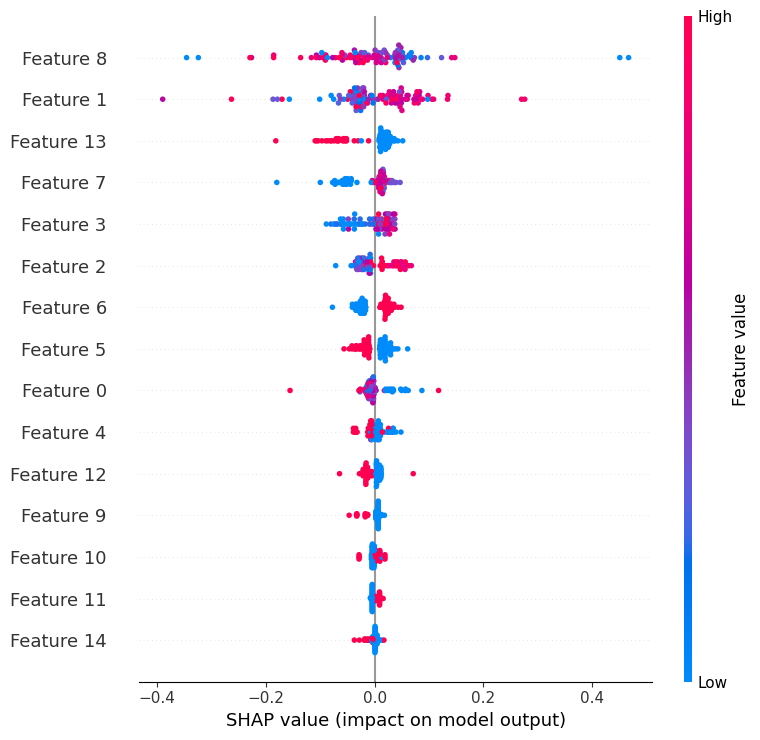

In [ ]:
!pip install shap
import shap

# 1. Initialize the explainer for the Gradient Boosting model
explainer = shap.TreeExplainer(gboost_refined)

# 2. Compute SHAP values for a sample of data points from the test set
sample_data = X_test_refined_selected[:100]
shap_values = explainer.shap_values(sample_data)

# 3. Visualize the SHAP summary plot
shap.summary_plot(shap_values, sample_data)
